In [3]:
import numpy as np
from math import e,pi,sin,cos
import matplotlib.pyplot as plt

# Activity 7 - Predator Prey Model

Today we are going to play around with a simple predator-prey population model.

Imagine an ecosystem with abundant resources, and only two animal species:  a small herbivore (rabbits), and a medium sized carnivore (bobcat).  It is clear that the populations of these two animal species will depend on one another.  The growth rate of the predator population will depend negatively on itself (more mouths to feed) and positively on the prey population.  The growth rate of the prey species will be the opposite depending negatively on the predator population and positively on its own population.  We can model this relationship with a system of linear, first-order, ordinary differential equations.

$$ \begin{array}{lr} \displaystyle\frac{dx_1}{dt} =& -ax_1(t) + bx_2(t) \\ \displaystyle\frac{dx_2}{dt} =& -bx_1(t) + cx_2(t) \end{array} $$

where $ x_1(t) $ is the population of the predator species and $ x_2(t) $ is the population of the prey species at time time $ t $.  The factor $ a $ can be viewed as the decay rate of the predator species in the absence of prey, while $ c $ is the growth rate of the prey species in the absence of predators.  The rate of predation is $ b $.

### Solution

The general solution to this system of LODEs is given by

$$ \mathbf{x}(t) = \alpha \mathbf{v_1}e^{\lambda_1 t} + \beta \mathbf{v_2}e^{\lambda_2 t} $$

where $ \lambda_1,\lambda_2 $  are the eigenvalues and $ \mathbf{v_1}, \mathbf{v_2} $ are the corresponding eigenvectors of the coefficient matrix.

#### Example:
Consider the system with coefficient matrix is $ A = \left[\begin{array}{cc} -0.04 & 0.2 \\ -0.2 & 0.4 \end{array}\right] $ from the previous part of this activity.  To find the general solution we need the eigenvalues and eigenvectors.  We can use the function `np.linalg.eig` from the linear algebra sub-library of NumPy.

In [2]:
# First program in the matrix
A = np.matrix([[-0.04,0.2],[-0.2,0.4]])

# Then call the eig function
Lam,V = np.linalg.eig(A)
print(Lam)
print(V)

[0.08834849 0.27165151]
[[-0.84160495 -0.54009361]
 [-0.54009361 -0.84160495]]


We can plot the general solution on the interval $[0,T]$ for various combinations of $ \alpha $ and $ \beta $, just change the values in the first two lines.

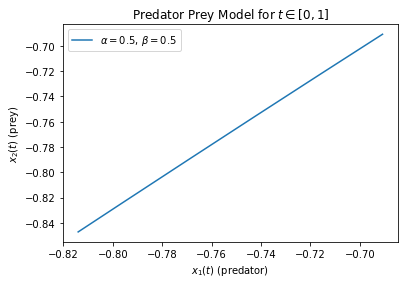

In [8]:
alpha = 0.5
beta = 0.5
T = 1
time = [t/200 for t in range(int(T*200)+1)]          # 200 points between 0 and T
x1t = np.array([V[:,0]*e**(Lam[0]*t) for t in time]) # v_1e^{lam_1*t} for each t in [0,T]
x2t = np.array([V[:,1]*e**(Lam[1]*t) for t in time]) # v_1e^{lam_1*t} for each t in [0,T]
xt = alpha*x1t + beta*x2t                            # linear combination of the two solutions
plt.plot(xt[:,0,0],xt[:,1,0],label=r'$\alpha={}$, $\beta={}$'.format(alpha,beta)) # first row is x, second row is y
plt.title(r'Predator Prey Model for $t \in [0,{}]$'.format(T))
plt.xlabel('$x_1(t)$ (predator)')
plt.ylabel('$x_2(t)$ (prey)')
plt.legend()
plt.show()

This plot indicates that both the predator and prey species start with negative populations and they both grow more negative over time.  This doesn't make sense, so let's try a different coefficient matrix.

In [9]:
# First program in the matrix
A = np.matrix([[-0.4,0.2],[-0.2,0.4]])

# Then call the eig function
Lam,V = np.linalg.eig(A)
print(Lam)
print(V)

[-0.34641016  0.34641016]
[[-0.96592583 -0.25881905]
 [-0.25881905 -0.96592583]]


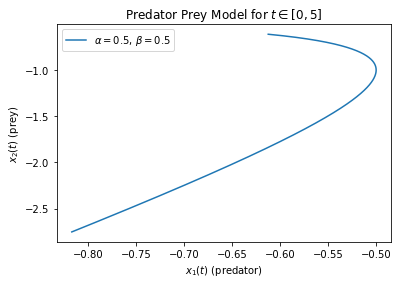

In [14]:
alpha = 0.5
beta = 0.5
T = 5
time = [t/200 for t in range(int(T*200)+1)]          # 200 points between 0 and T
x1t = np.array([V[:,0]*e**(Lam[0]*t) for t in time]) # v_1e^{lam_1*t} for each t in [0,T]
x2t = np.array([V[:,1]*e**(Lam[1]*t) for t in time]) # v_1e^{lam_1*t} for each t in [0,T]
xt = alpha*x1t + beta*x2t                            # linear combination of the two solutions
plt.plot(xt[:,0,0],xt[:,1,0],label=r'$\alpha={}$, $\beta={}$'.format(alpha,beta))
plt.title(r'Predator Prey Model for $t \in [0,{}]$'.format(T))
plt.xlabel('$x_1(t)$ (predator)')
plt.ylabel('$x_2(t)$ (prey)')
plt.legend()
plt.show()

In [15]:
# First program in the matrix
A = np.matrix([[-0.2,0.4],[-0.4,0.2]])

# Then call the eig function
Lam,V = np.linalg.eig(A)
print(Lam)
print(V)

[5.40079798e-19+0.34641016j 5.40079798e-19-0.34641016j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.35355339+0.61237244j 0.35355339-0.61237244j]]


Now hold on a minute, the eigenvalues and eigenvectors are not real numbers, but complex.  We can't have imaginary populations, so how does this work?

### Complex eigenvalues and eigenvectors.

The short answer is that the real part of the eigenvalues behaves as we have seen so far by giving us an exponential factor in the solution, while the imaginary part gives us a periodic function, sine for one solution function and cosine for the other.  Both the real part of the eigenvectors and the imaginary part work as eigenvectors on their own, the real part going with the solution function that has cosine and the imaginary part going with the one that has sine.

Given that the two eigenvalues are $ a\pm bi $ with eigenvectors $ \mathbf{v_1} \pm \mathbf{v_2}i $, we have general solution

$$ \mathbf{x}(t) = \alpha \mathbf{v_1}e^{a t}\cos(bt) + \beta \mathbf{v_2}e^{a t}\sin(bt). $$

We can extract the real and imaginary parts of numbers or vectors using the `.real` and `.imag` methods.

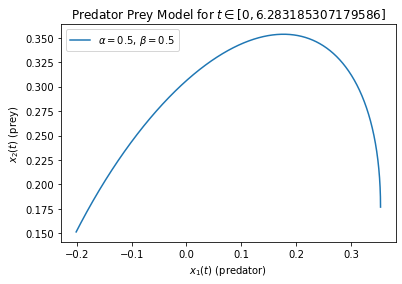

In [17]:
alpha = 0.5
beta = 0.5
T = 2*pi
time = [t/200 for t in range(int(T*200)+1)]
lam_real = Lam[0].real
lam_imag = Lam[0].imag
V_real = V[:,0].real
V_imag = V[:,0].imag
x1t = np.array([V_real*e**(lam_real*t)*cos(lam_imag*t) for t in time])
x2t = np.array([V_imag*e**(lam_real*t)*sin(lam_imag*t) for t in time])
xt = alpha*x1t + beta*x2t
plt.plot(xt[:,0,0],xt[:,1,0],label=r'$\alpha={}$, $\beta={}$'.format(alpha,beta))
plt.title(r'Predator Prey Model for $t \in [0,{}]$'.format(T))
plt.xlabel('$x_1(t)$ (predator)')
plt.ylabel('$x_2(t)$ (prey)')
plt.legend()
plt.show()

### Turning the code into functions

To make our lives easier, I have turned the code above into a few functions.

In [4]:
def PredatorPrey(a,b,c,alpha,beta,T):
    A = np.matrix([[-a,b],[-b,c]])
    Lam,V = np.linalg.eig(A)
    time = [t/200 for t in range(int(200*T)+1)]
    if np.iscomplex(Lam[0]):
        lam_real = Lam[0].real
        lam_imag = Lam[0].imag
        V_real = V[:,0].real
        V_imag = V[:,0].imag
        x1t = np.array([V_real*e**(lam_real*t)*cos(lam_imag*t) for t in time])
        x2t = np.array([V_imag*e**(lam_real*t)*sin(lam_imag*t) for t in time])
    else:
        x1t = np.array([V[:,0]*e**(Lam[0]*t) for t in time])
        x2t = np.array([V[:,1]*e**(Lam[1]*t) for t in time])
    xt = alpha*x1t + beta*x2t
    return xt

In [5]:
def PlotPredatorPrey(a,b,c,alpha,beta,T):
    xt = PredatorPrey(a,b,c,alpha,beta,T)
    plt.plot(xt[:,0,0],xt[:,1,0],label=r'$\alpha={}$, $\beta={}$'.format(alpha,beta))
    plt.title(r'Predator Prey Model for $t \in [0,{}]$'.format(T))
    plt.xlabel('$x_1(t)$ (predator)')
    plt.ylabel('$x_2(t)$ (prey)')
    plt.legend()
    plt.show()

### Experiment

You can now explore how the values of $ a, b, c $ affect the behavior of the model.  Try increasing the value of $ T $.

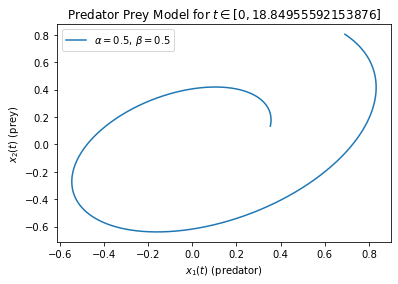

In [6]:
PlotPredatorPrey(a=0.1,b=0.4,c=0.2,alpha=0.5,beta=0.5,T=6*pi)

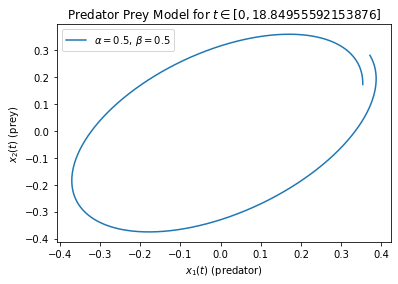

In [7]:
PlotPredatorPrey(a=0.19,b=0.4,c=0.2,alpha=0.5,beta=0.5,T=6*pi)

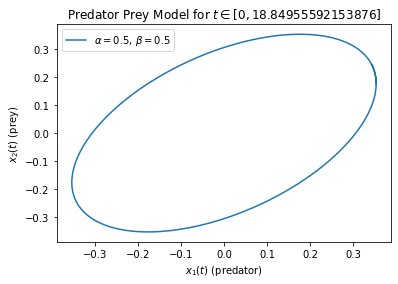

In [8]:
PlotPredatorPrey(a=0.2,b=0.4,c=0.2,alpha=0.5,beta=0.5,T=6*pi)

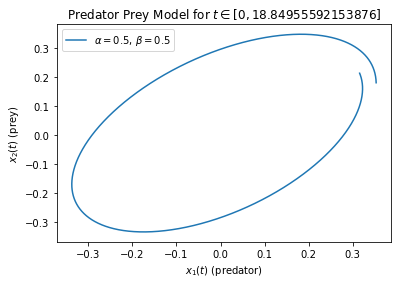

In [9]:
PlotPredatorPrey(a=0.21,b=0.4,c=0.2,alpha=0.5,beta=0.5,T=6*pi)